# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [2]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code

# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    
# 让结果在notebook中显示
%matplotlib inline

In [3]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [4]:
#TODO 1

#目标：计算价值的最小值
minimum_price = min(prices)

#目标：计算价值的最大值
maximum_price = max(prices)

#目标：计算价值的平均值
mean_price = np.mean(prices)

#目标：计算价值的中值
median_price = np.median(prices)

#目标：计算价值的标准差
std_price = np.std(prices)

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的业主属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

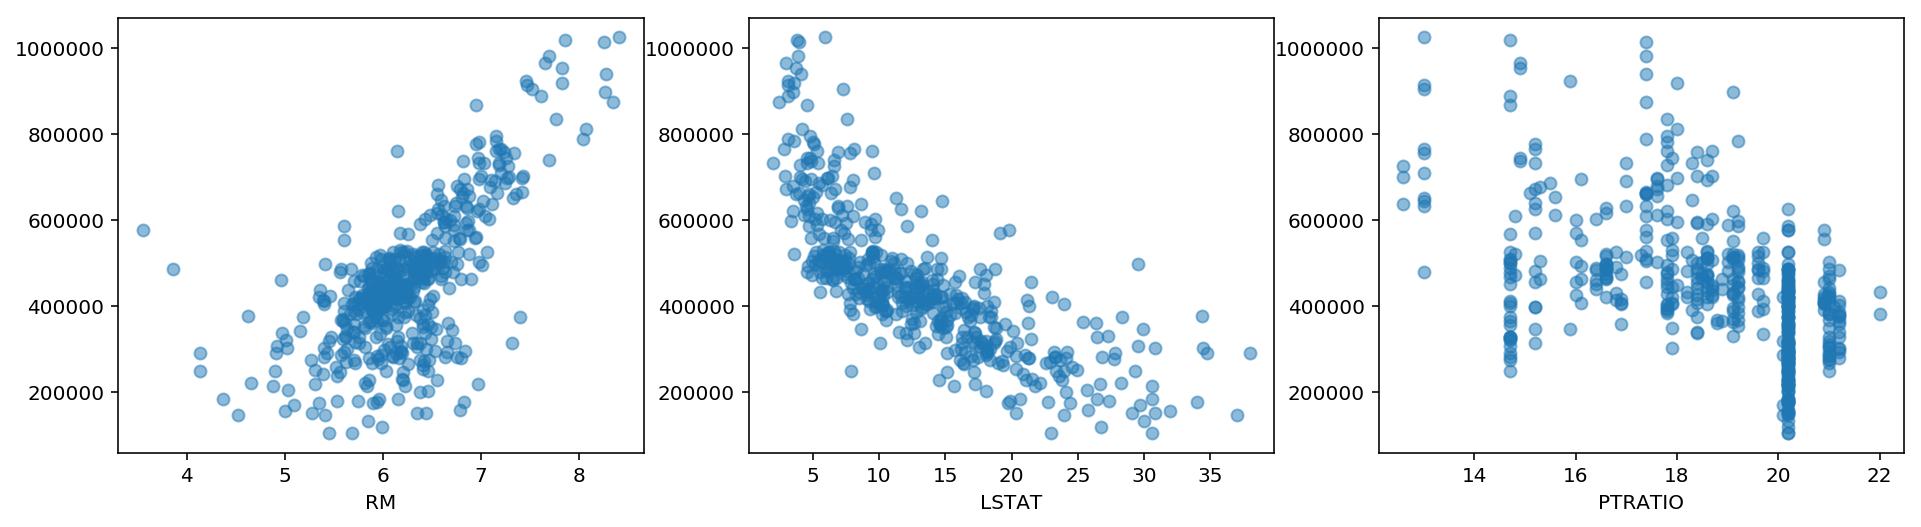

In [5]:
# 载入画图所需要的库 matplotlib
import matplotlib.pyplot as plt

# 使输出的图像以更高清的方式显示
%config InlineBackend.figure_format = 'retina'

# 调整图像的宽高
plt.figure(figsize=(16, 4))
for i, key in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(1, 3, i+1)
    plt.xlabel(key)
    plt.scatter(data[key], data['MEDV'], alpha=0.5)

### 问题 1 - 回答：

1.对于'RM'(每个房屋的平均房间数量)来说，越多的平均房间数量可能意味着越大面积的房子，所以"MEDV"值会增大。

2.对于'LSTAT'(该地区有多少百分比的业主属于是低收入阶层)来说,越高意味着越多的低收入群体，低收入群体可能买不起高房价的房子，所以"MEDV"值会减小。

3.对于'PTRATIO'(该地区的中学和小学里，学生和老师的数目比)来说，越高意味着师资力量越弱，或者教育资源稀缺，所以"MEDV"值会减小。

分析散点图：

1.RM越大，房价呈增长趋势。

2.LSTAT越大，房价呈下降趋势。

3.随着PTRATIO的增大，高房价渐渐变少。

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；

In [49]:
# TODO 2

# 提示： 导入train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 26)

### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:

1.训练数据集用于学习样本，构建一个模型；测试数据集用于测试已经构建好的模型。一些模型往往在训练集表现良好，甚至完美拟合了数据(过拟合，overfitting),然而，如果新添加进来新的数据，这种模型可能表现糟糕。为了找到泛化能力更强的模型，我们除了用训练集构建模型，还应该用一部分数据作为测试集，来查看模型的泛化能力。

2.不能把测试数据用作训练模型，如果把测试数据用作训练，相当于模型已经知道了这部分数据，再测试时就是拿模型已知的数据进行测试，这就失去了测试集的意义；测试集的意义在于测试模型的泛化能力，如果用训练数据进行测试，没有达到检查模型泛化能力的目的。

---
## 第三步. 模型衡量标准
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

或 

- (可选) 不使用任何外部库，参考[决定系数的定义](https://en.wikipedia.org/wiki/Coefficient_of_determination)进行计算，这也可以帮助你更好的理解决定系数在什么情况下等于0或等于1。

In [38]:
# TODO 3

# 提示： 导入r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""

    score = r2_score(y_true, y_predict)

    return score

In [39]:
# TODO 3 可选

# 不允许导入任何计算决定系数的库

def performance_metric2(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    linear_squared_error =  pow(y_true - y_predict, 2).sum()
    mean_squared_error =  pow(y_true - y_true.mean(), 2).sum()
    score = 1 - linear_squared_error/mean_squared_error
    
    return score


### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [61]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:

这个数据集的R2值为0.923，接近1，是一个不错的模型，所以这个模型成功的描述了目标变量变化

---
## 第四步. 分析模型的表现
在项目的第四步，我们来看一下不同参数下，模型在训练集和验证集上的表现。这里，我们专注于一个特定的算法（带剪枝的决策树，但这并不是这个项目的重点），和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益，这可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观得显示了随着训练数据量的增加，模型学习曲线的在训练集评分和验证集评分的变化，评分使用决定系数R<sup>2</sup>。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

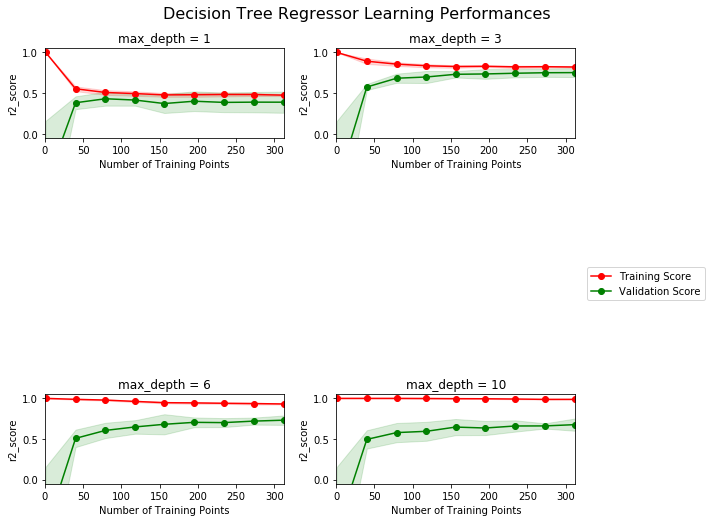

In [22]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)

### 问题 4 - 学习曲线
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练集曲线的评分有怎样的变化？验证集曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*

**提示：**学习曲线的评分是否最终会收敛到特定的值？

### 问题 4 - 回答:

对于max_depth=1的模型来说，其最大深度为1，开始时，训练数据得分为1，而因为数据量很少，所以测试得分很低；而在训练数据达到50之后，可以明显看出训练得分与测试得分渐渐接近0.5，在之后测试得分一直没有超过0.5，说明这个模型欠拟合，不是一个好的模型。

对于max_depth=3的模型来说，其最大深度为3，开始时，其r2得分接近1，因为数据量过少，所以其测试得分为0；在增加训练数据量后，其r2得分有所下降，而测试得分在训练数据量50左右就有明显上升，并在之后渐渐与训练得分收敛于一个值，并且这个值比较高，可以看出这是一个不错的模型。

对于max_depth=6,我分析认为其与max_depth=3相似，只是需要更多地训练数据，才能最终得到一个理想的收敛值。

对于max_depth=10,其训练得分一直接近1，而随着训练数据量的增大，其测试得分渐渐升高，但一直与训练得分有一定的差距，且在图中看不出二者有相交的倾向；这说明这个模型过多的记录了训练模型的数据，而没有真正学习它，所以这个模型过拟合，不是一个理想的模型。

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

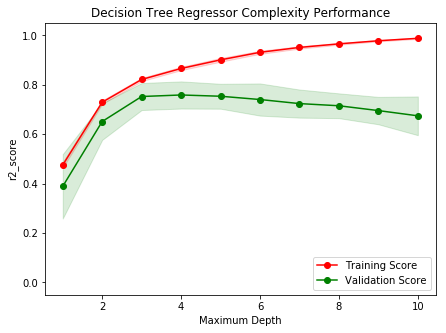

In [23]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

### 问题 5 - 偏差（bias）与方差（variance）之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

### 问题 5 - 回答:

当模型最大深度1训练时，模型的训练得分和测试得分都低于0.5，测试得分还低于0.4，说明这个模型欠拟合，未能正确描述数据，出现了高偏差误差；

当模型最大深度为10训练时，训练得分接近于1，而测试得分低于0.7，这说明这个模型过拟合，模型记住了这些数据，而没有正确的学习，所以测试得分比训练得分低很多，这是高方差误差

### 问题 6- 最优模型的猜测
*结合问题 5 中的图，你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？你得出这个答案的依据是什么？*

### 问题 6 - 回答:

对于图5，我认为最大深度3的模型能最好的对未见的数据进行预测，因为此时，训练得分和测试得分收敛于1个评分较高的值，说明此时模型可以较好地模拟出数据；如果深度小与2，由于得分过低，会出现欠拟合现象，如果分数过高，会出现过拟合现象。在深度为3的地方训练得分与测试得分渐渐分开。

---
## 第五步. 选择最优参数

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化模型？*



### 问题 7 - 回答:

在训练模型时，可能有多个超参数（上面的max_depth），如何选择出最优的组合？可以用到网格搜索法，即列出一个表格，把超参数的不同组合列出来，根据给出的参数及参数值来遍历参数组合，选择最佳组合。

网格搜索把数据分为训练集，测试集和验证集。通过制作一个表格，列出所有参数组合的可能性。通过交叉验证计算不同模型的得分，然后网格搜索遍历所有模型，选出评分最高的模型。

### 问题 8 - 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索时如果不使用交叉验证会有什么问题？交叉验证又是如何解决这个问题的？

**提示：** 在下面 fit_model函数最后加入 `print pd.DataFrame(grid.cv_results_)` 可以帮你查看更多信息。

### 问题 8 - 回答：

K折交叉验证法:是一个循环利用数据的方法。在交叉验证过程中，有一部分数据（验证集）用来测试模型，但是这部分数据实际上可以用来训练模型而没有得到利用。所以我们可以把数据分为K份（这里的数据指的是从原始数据中划分出来的训练集，而测试集需要保留到最后来测试模型）。然后用这K份数据训练模型，而这K份数据中的每一份都会被用做一次测试（当做验证集），而用剩下的K-1份数据进行训练模型；最后对这K次训练的结果求平均值，得到了最终模型。这样既保证了对不同参数模型的筛选，有没有作弊，直到最后一刻，才使用测试集进行测试。
    如果只进行一次分割，不进行多次（K次）分割，也许分割的数据和原始数据分布相同，这样就有过拟合的可能性，为了避免这样的情况，多次分割数据可以得到不同的最优模型。

GridSearchCV 的参数cv 即cross-validation，就是交叉验证的参数。默认None，使用3折交叉验证；可以使用整型来确定交叉验证的fold数量；也可传入交叉验证的生成器或迭代器。
网格搜索与交叉验证的结合方式：例如有depth 1-5不同的深度参数，对于每一个不同的深度，例如1，分别使用K折交叉验证，求出这一层深度的模型，同理，求出其它层数的模型，最终通过网格搜索，比较5个模型，得出最优的结果。

'cv_results_'属性保存了不同的超参数组合以及计算结果，以字典的形式保存。

如果在网格搜索时不使用交叉验证，为了计算不同超参数的模型，可能不得不把测试数据的一部分拿来用于选择模型，这是不允许的。
交叉验证解决了这个问题，把数据分为三部分：训练集，测试集以及交叉验证集；训练集用于训练模型；交叉验证集用于对模型做出决定，选择合适的超参数；测试集用于测试数据。


### 编程练习 4：训练最优模型
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：
1. **定义 `'cross_validator'` 变量**: 使用 `sklearn.model_selection` 中的 [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) 创建一个交叉验证生成器对象;
2. **定义 `'regressor'` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
3. **定义 `'params'` 变量**: 为 `'max_depth'` 参数创造一个字典，它的值是从1至10的数组;
4. **定义 `'scoring_fnc'` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
 将 `‘performance_metric’` 作为参数传至这个函数中；
5. **定义 `'grid'` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`'regressor'`, `'params'`, `'scoring_fnc'`和 `'cross_validator'` 作为参数传至这个对象构造函数中；
  
如果你对python函数的默认参数定义和传递不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [46]:
# TODO 4

#提示: 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV' 
from sklearn.model_selection import KFold, GridSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold(n_splits=10, shuffle=False, random_state=None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    params = {'max_depth' : range(1,11)}

    scoring_fnc = make_scorer(performance_metric, greater_is_better=True)

    grid = GridSearchCV(cv = cross_validator, estimator = regressor, param_grid=params, scoring=scoring_fnc)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

### 编程练习 4：训练最优模型 （可选）
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：

- 遍历参数`‘max_depth’`的可选值 1～10，构造对应模型
- 计算当前模型的交叉验证分数
- 返回最优交叉验证分数对应的模型

In [ ]:
# TODO 4 可选

'''
不允许使用 DecisionTreeRegressor 以外的任何 sklearn 库

提示: 你可能需要实现下面的 cross_val_score 函数

def cross_val_score(estimator, X, y, scoring = performance_metric, cv=3):
    """ 返回每组交叉验证的模型分数的数组 """
    scores = [0,0,0]
    return scores
'''

def fit_model2(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    #最优交叉验证分数对应的最优模型
    best_estimator = None
    
    return best_estimator



### 问题 9 - 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [47]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### 问题 9 - 回答：

最优模型的最大深度是4，我预测的是3.在第六题的图中，3与4模型的得分几乎一样，所以我选择了深度小的模型。

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [58]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,375.00
Predicted selling price for Client 2's home: $231,980.00
Predicted selling price for Client 3's home: $868,612.50


### 问题 10 - 回答：

第一位客户的售价是 $403,375.00
第二位客户的售价是 $231,980.00
第三位客户的售价是 $868,612.50

我认为这样的售价比较合理，对比三位客户的售价预测，第二位客户售价最低，第三位客户最高，第一位客户适中。

第一位客户的售价适中，他的房子5间，社区贫困指数17\%，学生老师比15:1，所有指标都是出于适中位置，所以其售价也适中。

第二位客户售价最低，他的房间数最少(4),社区贫困指数非常高(32\%)，学生-老师比也最高(22:1)；房间少可能表示房屋对应面积小，社区平困指数高表示这一地区富人少，穷人多，学生-老师比高表示这一地区师资力量少，学校少。这些都暗示这一地区房价会比较低。

第三位客户售价最高，他的房间数最多(8),表示房屋面积大，社区贫困指数很低(3\%)，暗示这里可能是富人区，学生老师比12:1，也表示这里的教学资源丰富。所以这一地区房价较高。


### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [66]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, optimal_reg, performance_metric
# 提示：你可能需要参考问题10的代码进行预测
# 提示：你可能需要参考问题3的代码来计算R^2的值

predicted_price = optimal_reg.predict(X_test)
r2 = performance_metric(y_test, predicted_price)

print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

Optimal model has R^2 score 0.84 on test data


### 问题11 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？

### 问题11 - 回答

R2 得分0.84，说明这个模型是一个不错的模型，接近真实情况

### 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。

### 问题 12 - 模型健壮性

模型是否足够健壮来保证预测的一致性？

**提示**: 执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [68]:
# 请先注释掉 fit_model 函数里的所有 print 语句
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### 问题 12 - 回答：

最大预测价格和最小预测价格的差为$29438，我认为对于房价这是一个可以接受的价格差。所有10个数据的预测价格都在40万美元附近，所以这个模型足够健壮，其预测结果比较稳定。

### 问题 13 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

提示：回答以下几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在已考虑通货膨胀的前提下，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*
- *你觉得仅仅凭房屋所在社区的环境来判断房屋价值合理吗？*

### 问题 13 - 回答：

1.考虑了通胀的情况下，1978年的数据今天也不太可能适用。这是因为随着社会的发展，城市的中心，人民的收入水平，交通情况，地区发展水平等因素都发生了极大地变化，需要近几年的数据才能预测新的情况。

2.数据中的特征不足以描述一个房屋，有些更重要的特征，如：房屋南北朝向，是否二手房，是否有地铁，交通情况，社区医院等等重要因素。

3.在波士顿采集的数据，不能用于其它乡镇，因为其它乡镇的教育资源，人均收入，交通，医疗情况都与波士顿地区不同。

4.仅仅凭房屋所在社区的环境来判断房屋价值是不够的，因为还要考虑房屋朝向，房屋大小，新旧程度等来判断。

## 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中 `bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用网格搜索配合交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [79]:
# TODO 6

# 你的代码

#加载数据
bj_data = pd.read_csv('bj_housing.csv')
bj_prices = bj_data['Value']
bj_features = bj_data.drop('Value', axis = 1)
    
# 完成
print "Beijing housing dataset has {} data points with {} variables each.".format(*bj_data.shape)

Beijing housing dataset has 9999 data points with 7 variables each.


In [78]:
#目标：计算价值的最小值
bj_minimum_price = min(bj_prices)

#目标：计算价值的最大值
bj_maximum_price = max(bj_prices)

#目标：计算价值的平均值
bj_mean_price = np.mean(bj_prices)

#目标：计算价值的中值
bj_median_price = np.median(bj_prices)

#目标：计算价值的标准差
bj_std_price = np.std(bj_prices)

#目标：输出计算的结果
print "北京房价统计数据:\n"
print "最小价格: {:,.2f} 万元".format(bj_minimum_price)
print "最大价格: {:,.2f} 万元".format(bj_maximum_price)
print "平均价格: {:,.2f} 万元".format(bj_mean_price)
print "中位数 {:,.2f} 万元".format(bj_median_price)
print "标准差: {:,.2f} 万元".format(bj_std_price)

北京房价统计数据:

最小价格: 66.00 万元
最大价格: 7,450.00 万元
平均价格: 342.08 万元
中位数 280.00 万元
标准差: 259.39 万元


对于北京房价来说，其数据特征有

- Area：房屋面积，平方米                      越大则房屋价格越高

- Room：房间数，间                            房间数越多则房屋价格越高

- Living: 厅数，间                            厅越多则房屋价格越高

- School: 是否为学区房，0或1                  学区房价格更高

- Year: 房屋建造时间，年                      越新的房子越贵

- Floor: 房屋所处楼层，层                     处于中间的楼层应该高于底层和顶层。

In [80]:
#将数据分割为训练集和测试集
from sklearn.model_selection import train_test_split
bj_X_train, bj_X_test, bj_y_train, bj_y_test = train_test_split(bj_features, bj_prices, test_size = 0.2, random_state = 26)

In [81]:
# 基于训练数据，获得最优模型
bj_optimal_reg = fit_model(bj_X_train, bj_y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(bj_optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 7 for the optimal model.


In [82]:
bj_predicted_price = bj_optimal_reg.predict(bj_X_test)
bj_r2 = performance_metric(bj_y_test, bj_predicted_price)

print "Optimal model has R^2 score {:,.2f} on test data".format(bj_r2)

Optimal model has R^2 score 0.77 on test data


R2 score 0.77表示这个模型还算不错。

In [88]:
for i, price in enumerate(bj_predicted_price):
    print "客户{}的房屋价格是: {:,.2f}万元".format(i+1, price)

客户1的房屋价格是: 304.04万元
客户2的房屋价格是: 253.08万元
客户3的房屋价格是: 265.08万元
客户4的房屋价格是: 369.72万元
客户5的房屋价格是: 304.04万元
客户6的房屋价格是: 207.99万元
客户7的房屋价格是: 694.86万元
客户8的房屋价格是: 172.73万元
客户9的房屋价格是: 386.29万元
客户10的房屋价格是: 198.08万元
客户11的房屋价格是: 549.26万元
客户12的房屋价格是: 424.12万元
客户13的房屋价格是: 386.29万元
客户14的房屋价格是: 296.33万元
客户15的房屋价格是: 304.04万元
客户16的房屋价格是: 271.32万元
客户17的房屋价格是: 265.08万元
客户18的房屋价格是: 221.58万元
客户19的房屋价格是: 265.08万元
客户20的房屋价格是: 549.26万元
客户21的房屋价格是: 565.21万元
客户22的房屋价格是: 304.04万元
客户23的房屋价格是: 221.58万元
客户24的房屋价格是: 369.72万元
客户25的房屋价格是: 333.64万元
客户26的房屋价格是: 549.26万元
客户27的房屋价格是: 265.79万元
客户28的房屋价格是: 233.32万元
客户29的房屋价格是: 333.64万元
客户30的房屋价格是: 265.08万元
客户31的房屋价格是: 253.08万元
客户32的房屋价格是: 304.04万元
客户33的房屋价格是: 747.57万元
客户34的房屋价格是: 357.78万元
客户35的房屋价格是: 482.48万元
客户36的房屋价格是: 233.32万元
客户37的房屋价格是: 222.24万元
客户38的房屋价格是: 369.72万元
客户39的房屋价格是: 369.72万元
客户40的房屋价格是: 253.08万元
客户41的房屋价格是: 369.72万元
客户42的房屋价格是: 369.72万元
客户43的房屋价格是: 228.45万元
客户44的房屋价格是: 1,651.59万元
客户45的房屋价格是: 311.20万元
客户46的房屋价格是: 265.79万元
客户47的房屋价格是: 221.58万元
客户48的房屋价格是: 233.32万元

In [139]:
bj_max_idx = np.argmax(bj_predicted_price)
bj_X_test_df = pd.DataFrame(bj_X_test)
temp = bj_X_test_df.iloc[bj_max_idx]
isSchool = '' if temp['School'] == 0 else '不'
print("售价最高的房子价格是{}万元，面积是{}平方米，有{}间房，{}厅，{}是学区房，建造于{}年，{}层楼".format(max(bj_predicted_price), temp['Area'], temp['Room'], temp['Living'], isSchool, temp['Year'], temp['Floor']))

售价最高的房子价格是7450.0万元，面积是728平方米，有4间房，2厅，是学区房，建造于2004年，33层楼


In [140]:
bj_min_idx = np.argmin(bj_predicted_price)
temp = bj_X_test_df.iloc[bj_min_idx]
isSchool = '' if temp['School'] == 0 else '不'
print("售价最低的房子价格是{}万元，面积是{}平方米，有{}间房，{}厅，{}是学区房，建造于{}年，{}层楼".format(min(bj_predicted_price), temp['Area'], temp['Room'], temp['Living'], isSchool, temp['Year'], temp['Floor']))

售价最低的房子价格是129.075949367万元，面积是28平方米，有1间房，1厅，是学区房，建造于2007年，17层楼


In [141]:
def rdm_house_price():
    random_idx = np.random.randint(0, len(bj_predicted_price))
    temp = bj_X_test_df.iloc[random_idx]
    isSchool = '' if temp['School'] == 0 else '不'
    value = bj_predicted_price[random_idx]
    print("随机房子{}的价格是{}万元，面积是{}平方米，有{}间房，{}厅，{}是学区房，建造于{}年，{}层楼".format(random_idx, value, temp['Area'], temp['Room'], temp['Living'], isSchool, temp['Year'], temp['Floor']))

for i in range(0,10):
    rdm_house_price()

随机房子76的价格是228.083333333万元，面积是92平方米，有2间房，1厅，是学区房，建造于2001年，32层楼
随机房子177的价格是369.723826715万元，面积是90平方米，有2间房，1厅，是学区房，建造于1995年，18层楼
随机房子888的价格是207.957142857万元，面积是55平方米，有2间房，1厅，是学区房，建造于1989年，6层楼
随机房子585的价格是254.920353982万元，面积是71平方米，有1间房，2厅，是学区房，建造于2008年，11层楼
随机房子1744的价格是296.333333333万元，面积是70平方米，有1间房，1厅，是学区房，建造于2002年，11层楼
随机房子1548的价格是233.32173913万元，面积是55平方米，有2间房，1厅，不是学区房，建造于1984年，6层楼
随机房子1973的价格是304.04389313万元，面积是68平方米，有1间房，1厅，不是学区房，建造于2000年，26层楼
随机房子1092的价格是129.075949367万元，面积是14平方米，有1间房，0厅，是学区房，建造于1985年，3层楼
随机房子1046的价格是228.448548813万元，面积是59平方米，有2间房，1厅，是学区房，建造于2000年，6层楼
随机房子970的价格是565.209677419万元，面积是159平方米，有3间房，2厅，是学区房，建造于2001年，14层楼


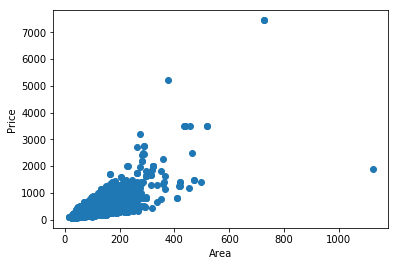

In [144]:
import matplotlib.pyplot as plt

_price = bj_data['Value']
_area = bj_data['Area']

plt.plot(_area,_price,'o')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

可以看出，房屋面积与价格有一定的相关性，面积大的房屋价格更高

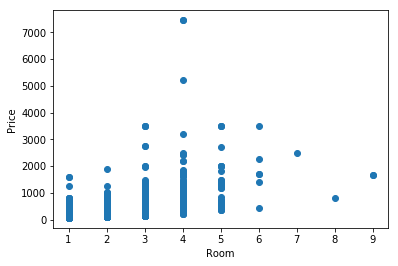

In [145]:
_room = bj_data['Room']

plt.plot(_room,_price,'o')
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

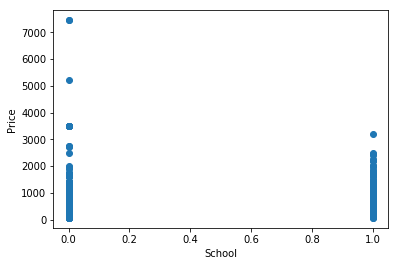

In [146]:
_school = bj_data['School']

plt.plot(_school,_price,'o')
plt.xlabel('School')
plt.ylabel('Price')
plt.show()

### 问题14 - 北京房价预测
你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**提示：**如果你是从零开始构建机器学习的代码会让你一时觉得无从下手。这时不要着急，你要做的只是查看之前写的代码，把每一行都看明白，然后逐步构建你的模型。当中遇到什么问题也可以在我们论坛寻找答案。也许你会发现你所构建的模型的表现并没有达到你的预期，这说明机器学习并非是一项简单的任务，构建一个表现良好的模型需要长时间的研究和测试。这也是我们接下来的课程中会逐渐学到的。

### 问题14 - 回答

构建了新的模型，可以对测试数据进行验证，基本符合预期。